In [31]:
import logging
import multiprocessing
from pprint import pprint
import pyedflib
from pandas import Timedelta
from pyedflib import highlevel, EdfReader

import datetime
import matplotlib.pyplot as plt

from config.paths import PATHS, Dataset
from config.paths import PatientDir

In [18]:
patient_dir = PatientDir(PATHS.for_mayo_dir / 'B52K3P3G')
# patient_dir = PatientDir(PATHS.competition_dir / 'P1')
file_path = next(patient_dir.edf_dir.iterdir())  # get the first edf
file_path

PosixPath('/data/home/webb/UNEEG_data/20240201_UNEEG_ForMayo/B52K3P3G/edf_data/B52K3P3G_2021-10-15_08-19-10.edf')

In [11]:
edf = pyedflib.EdfReader(str(file_path))

start_date_time = datetime.datetime(edf.startdate_year, edf.startdate_month, edf.startdate_day, edf.starttime_hour,
                                    edf.starttime_minute, edf.starttime_second, edf.starttime_subsecond)
duration = datetime.timedelta(seconds=edf.file_duration)
end_date_time = start_date_time + duration

print(f'{start_date_time=}')
print(f'{duration=}')
print(f'{end_date_time=}')

edf.close()

start_date_time=datetime.datetime(2020, 11, 18, 11, 39, 38)
duration=datetime.timedelta(seconds=21636, microseconds=754000)
end_date_time=datetime.datetime(2020, 11, 18, 17, 40, 14, 754000)


n_samples=4474719
sampling_freq_hz=207.0310546581987
duration_sec=21613.75745
duration= 6:00:13.757450 h
edf.datarecord_duration=0.99985


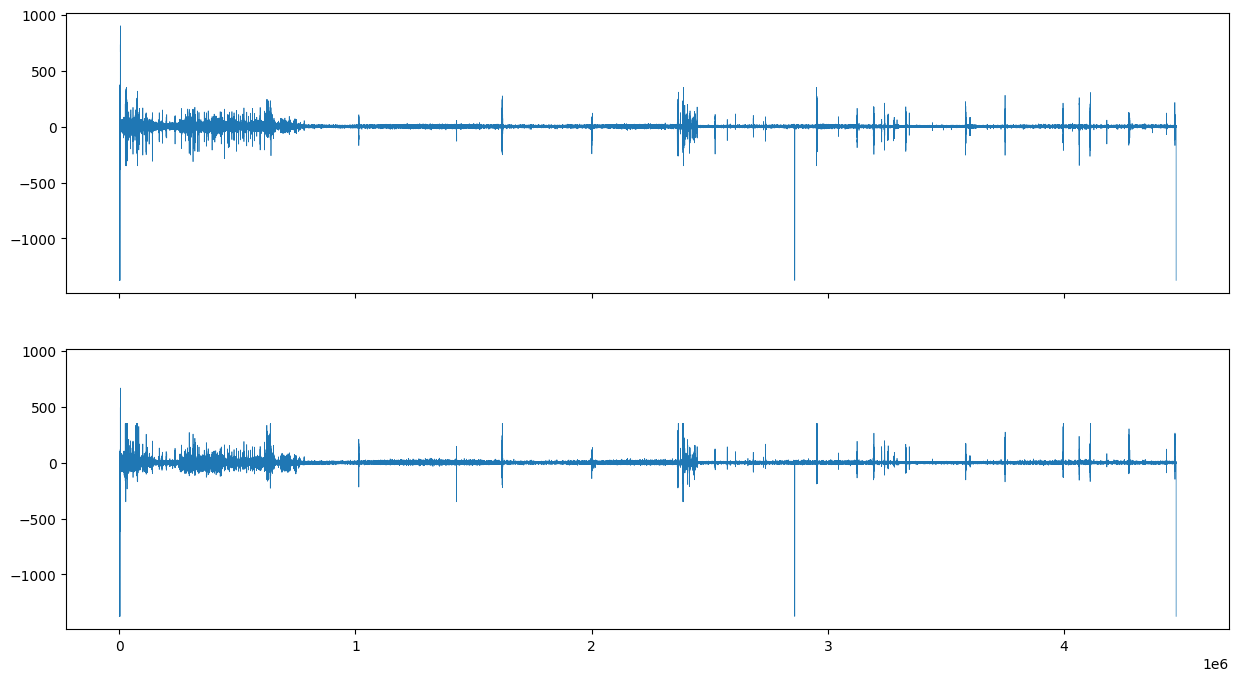

In [5]:
edf = pyedflib.EdfReader(str(file_path))

n_signals = edf.signals_in_file
assert edf.getNSamples()[0] == edf.getNSamples()[1], 'Number of samples is unequal for different channels'
n_samples = edf.getNSamples()[0]
print(f'n_samples={n_samples}')

assert edf.samplefrequency(0) == edf.samplefrequency(1), "Sampling Frequency isn't equal for both channels"
sampling_freq_hz = edf.samplefrequency(0)
print(f'{sampling_freq_hz=}')

duration_sec = n_samples / sampling_freq_hz
print(f'duration_sec={duration_sec}')
print(f'duration= {str(datetime.timedelta(seconds=duration_sec))} h')

print(f'{edf.datarecord_duration=}')

fig, ax = plt.subplots(nrows=n_signals, sharex=True, sharey=True, figsize=(15, 8))
for i in range(n_signals):
    ax[i].plot(edf.readSignal(i), linewidth=0.5)

edf.close()

In [6]:
del ax, duration, duration_sec, edf, end_date_time, start_date_time, fig, n_samples, n_signals, sampling_freq_hz

In [19]:
signals, signal_headers, header = highlevel.read_edf(str(file_path), ch_names=['EEG SQ_D-SQ_C', 'EEG SQ_P-SQ_C'])
header = highlevel.read_edf_header(str(file_path))
# signals, signal_header, header = highlevel.read_edf(str(file_path))

# local_time: str = header['annotations'][0][2]
# local_time = local_time.removeprefix('LOCAL TIME = ')
# print(f'{local_time=}')

start = header['startdate']
print(f"{start=}")

duration = Timedelta(seconds=header['Duration'])
print(f'{duration=}')

start=datetime.datetime(2021, 10, 15, 9, 19, 10)
duration=Timedelta('0 days 00:33:27.698800')


In [12]:
# Cut a window of a specified size
sampling_freq_hz = signal_headers[0]['sample_frequency']

WINDOW_SIZE_SEC = 10.0
window_size_idx = round(WINDOW_SIZE_SEC * sampling_freq_hz)
print(f'{window_size_idx=}')

window_size_idx=2070


In [15]:
def time_to_index(start_time: datetime.datetime, cur_time: datetime.datetime, sampling_freq_hz: float) -> float:
    """Based on the specified date & time of day in a recording, calculate the index of that timestamp.
    Note: the index will be returned as a float so that the reverse conversion can be made accurately. If actually used to index, round it."""
    time_dif = cur_time - start_time
    return time_dif.total_seconds() * sampling_freq_hz


def index_to_time(start_time: datetime.datetime, index: float, sampling_freq_hz: float):
    """Based on the specified index in a recording, calculate the date & time of that index."""
    time_dif = datetime.timedelta(seconds=index / sampling_freq_hz)
    return start_time + time_dif


date1 = datetime.datetime(2025, 7, 29, 10, 30, 0)  # Example: July 29, 2025, 10:30:00
date2 = datetime.datetime(2025, 7, 29, 12, 0, 0)  # Example: July 29, 2025, 12:00:00

index = time_to_index(date1, date2, sampling_freq_hz)
print(f'time to index: {index}')
print(f'index to time: {index_to_time(date1, index, sampling_freq_hz)}')

time to index: 1117967.695154273
index to time: 2025-07-29 12:00:00


In [23]:
edf = pyedflib.EdfReader(str(file_path))
edf.getHeader()
print(edf.signal_label(0))
print(edf.signal_label(1))
signal_headers = edf.getSignalHeaders()

b'EEG SQ_D-SQ_C   '
b'EEG SQ_P-SQ_C   '


In [27]:
edf.getSignalLabels()

['EEG SQ_D-SQ_C', 'EEG SQ_P-SQ_C']

In [28]:
edf.close()

In [71]:
with EdfReader(str(file_path)) as edf:
    #header = edf.getHeader()
    duration = edf.getFileDuration()
    start = edf.getStartdatetime()
    annotation = edf.read_annotation()
    annotations = edf.readAnnotations()

In [34]:
Timedelta(seconds=duration)

Timedelta('0 days 00:33:27.698800')

In [35]:
start

datetime.datetime(2021, 10, 15, 9, 19, 10)

In [70]:
annotation

[[0, b'', b'LOCAL TIME = UTC+02h']]

In [62]:
a = annotation[0][2]
a

b'LOCAL TIME = UTC+02h'

In [47]:
type(a)

bytes

In [63]:
# convert from bytes to str
a = a.decode()
a

'LOCAL TIME = UTC+02h'

In [68]:
a.removeprefix('LOCAL TIME = ').removesuffix('h') + ':00'

'UTC+02:00'

In [73]:
# ------

In [74]:
annotations

(array([0.]), array([-1.]), array(['LOCAL TIME = UTC+02h'], dtype='<U20'))

In [87]:
type(annotations[2])

numpy.ndarray

In [86]:
type(annotations[2][0])
# annotations[2][0].removeprefix('LOCAL TIME = ').removesuffix('h') + ':00'

numpy.str_

In [81]:
str(annotations[2][0])

'LOCAL TIME = UTC+02h'

In [88]:
tz = annotation[0][2].decode().removeprefix('LOCAL TIME = ').removesuffix('h') + ':00'
tz

'UTC+02:00'